In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np

# Define the sectors and their descriptions
sectors = {
    'XLB': 'Materials',
    'XLY': 'Consumer Discretionary',
    'XLF': 'Financials',
    'XLP': 'Consumer Staples',
    'XLV': 'Health Care',
    'XLU': 'Utilities',
    'XLE': 'Energy',
    'XLI': 'Industrials',
    'XLK': 'Technology',
}

start_date = '2002-01-01'
end_date = '2023-06-28'

# Create a mapping from month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

In [11]:
# Download S&P 500 data
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# Calculate monthly returns
sp500_data = sp500_data.resample('M').last() 
sp500_data['monthly_return'] = sp500_data['Close'].pct_change()

# Calculate average return for each month
sp500_monthly_avg_return = sp500_data.groupby(sp500_data.index.month)['monthly_return'].mean()

# Drop rows with NaN values in 'monthly_return'
sp500_data = sp500_data.dropna()

# Calculate percentage of positive months
positive_counts = sp500_data.groupby(sp500_data.index.month).apply(lambda x: (x['monthly_return'] > 0).sum())
total_counts = sp500_data.groupby(sp500_data.index.month).size()

sp500_positive_month_percentage = positive_counts / total_counts

# Fill NaN values with 0
sp500_positive_month_percentage = sp500_positive_month_percentage.fillna(0)


[*********************100%***********************]  1 of 1 completed


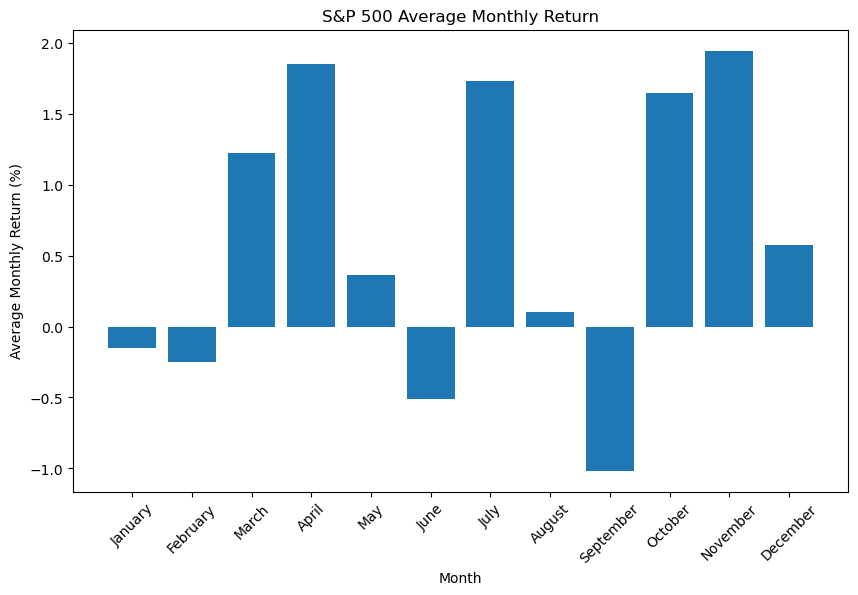

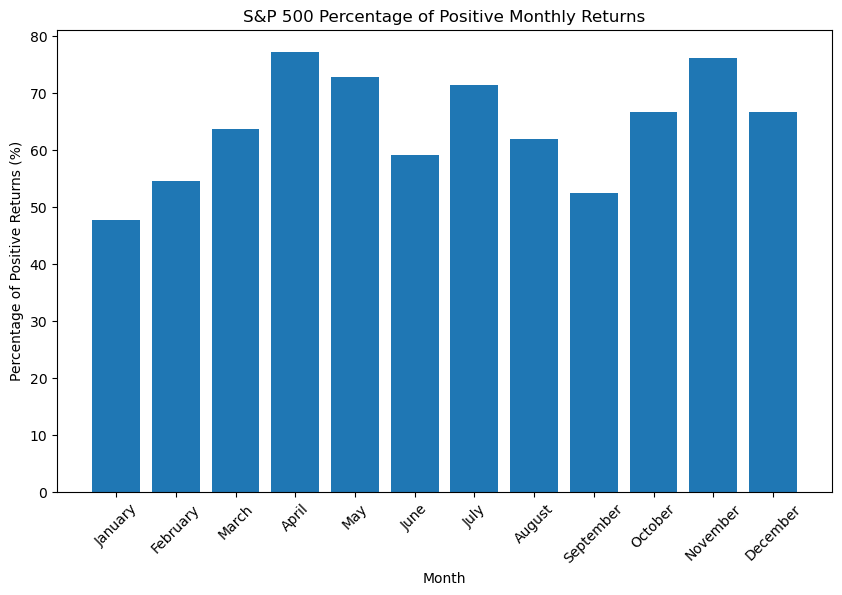

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), sp500_monthly_avg_return * 100)
plt.xlabel('Month')
plt.ylabel('Average Monthly Return (%)')
plt.title('S&P 500 Average Monthly Return')
plt.xticks(range(1, 13), month_names.values())
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), sp500_positive_month_percentage * 100)
plt.xlabel('Month')
plt.ylabel('Percentage of Positive Returns (%)')
plt.title('S&P 500 Percentage of Positive Monthly Returns')
plt.xticks(range(1, 13), month_names.values())
plt.xticks(rotation=45)
plt.show()

In [20]:
# Initialize a DataFrame to store the seasonality data for each sector
seasonality_average_monthly_returns = pd.DataFrame()

# Define the width of each bar
width = 0.08

# Use the keys (sector codes) for the download and calculation steps
for sector_code in sectors.keys():
    # Download historical data for the current sector
    data = yf.download(sector_code, start=start_date, end=end_date)
    
    # Calculate the monthly returns
    data['monthly_return'] = data['Close'].resample('M').ffill().pct_change()
    
    # Drop NaN values
    data = data.dropna()

    # Calculate the average returns for each month
    average_monthly_returns = data.groupby(data.index.month)['monthly_return'].mean()
    
    # Append the data to the seasonality dataframes
    seasonality_average_monthly_returns = pd.concat([seasonality_average_monthly_returns, average_monthly_returns.rename(sectors[sector_code])], axis=1)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


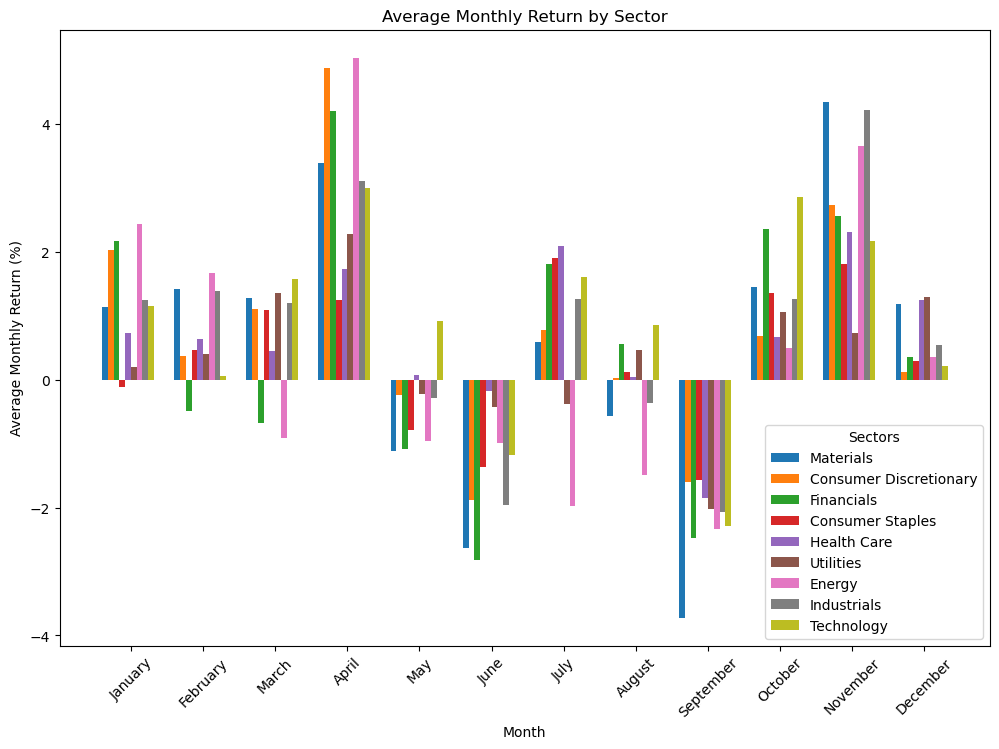

In [21]:

# Plotting
plt.figure(figsize=(12, 8))
for i, sector in enumerate(seasonality_average_monthly_returns.columns):
    plt.bar(np.arange(1, 13) + i * width, seasonality_average_monthly_returns[sector] * 100, width=width, label=sector)
plt.xlabel('Month')
plt.ylabel('Average Monthly Return (%)')
plt.title('Average Monthly Return by Sector')
plt.xticks(rotation=45)
plt.xticks(np.arange(1, 13) + width * len(sectors) / 2, month_names.values())
plt.legend(title="Sectors")
plt.show()